In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error

plt.style.use("fivethirtyeight")
color_pal = sns.color_palette()

In [2]:
# Load weather data
df = pd.read_pickle("../data/processed/climate_df_model.pkl")

<Axes: title={'center': 'Max Temperature Toronto City'}, xlabel='Date/Time'>

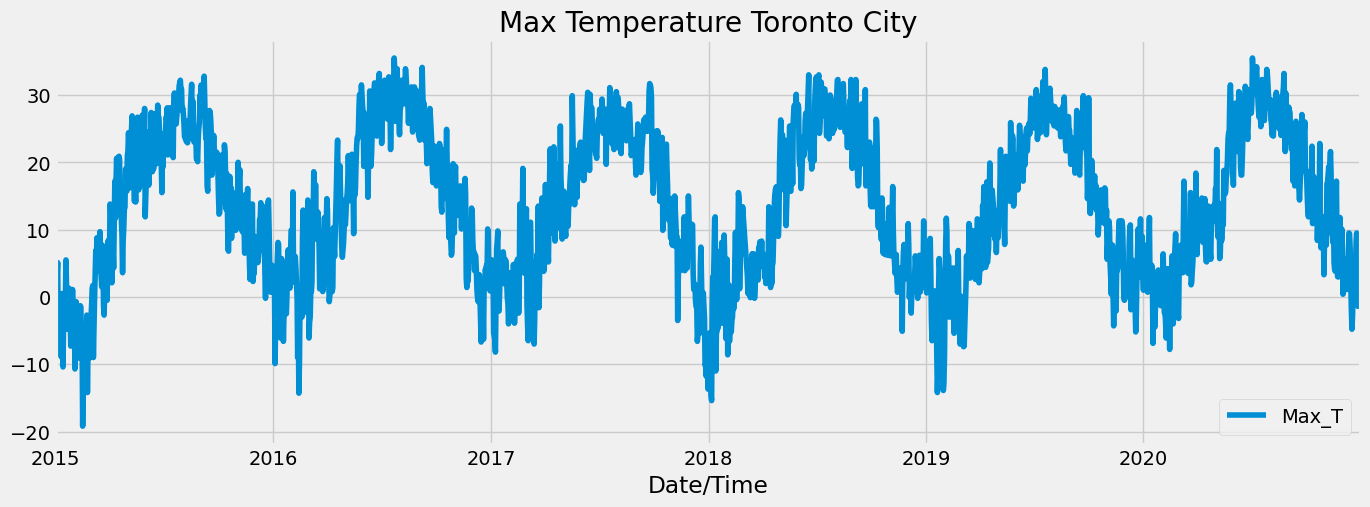

In [3]:
# Plot the temperature
df.plot(figsize=(15, 5), color=color_pal[0], title="Max Temperature Toronto City")

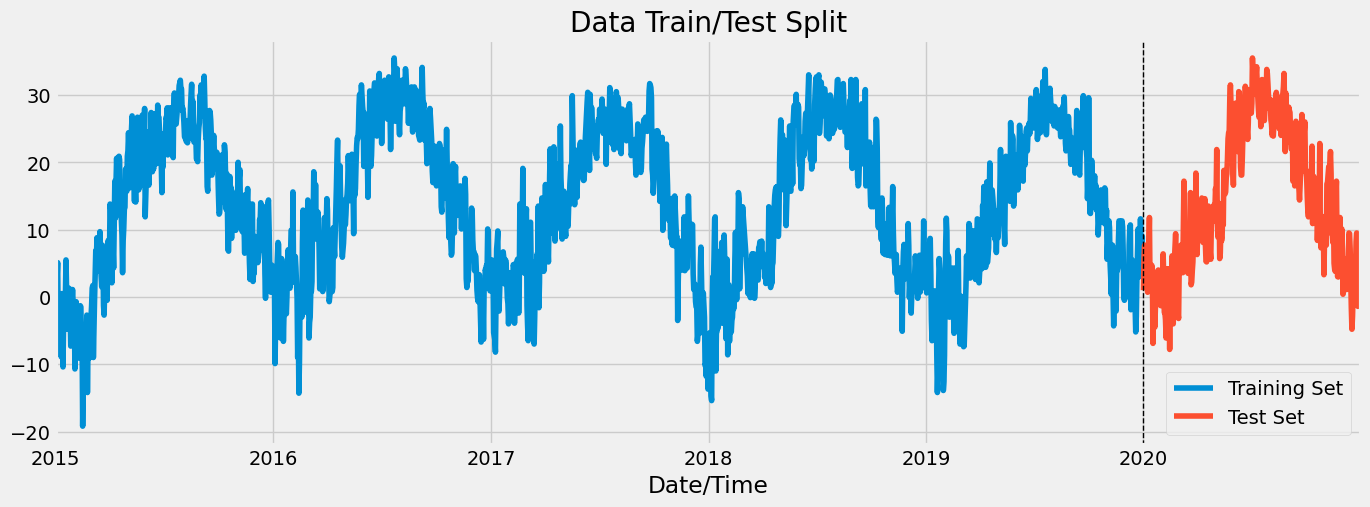

In [4]:
# Train / Test split

train = df.loc[df.index < "01-01-2020"]
test = df.loc[df.index >= "01-01-2020"]

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label="Training Set", title="Data Train/Test Split")
test.plot(ax=ax, label="Test Set")
ax.axvline("01-01-2020", color="black", linestyle="--", lw=1)
ax.legend(["Training Set", "Test Set"])
plt.show()

<Axes: xlabel='Date/Time'>

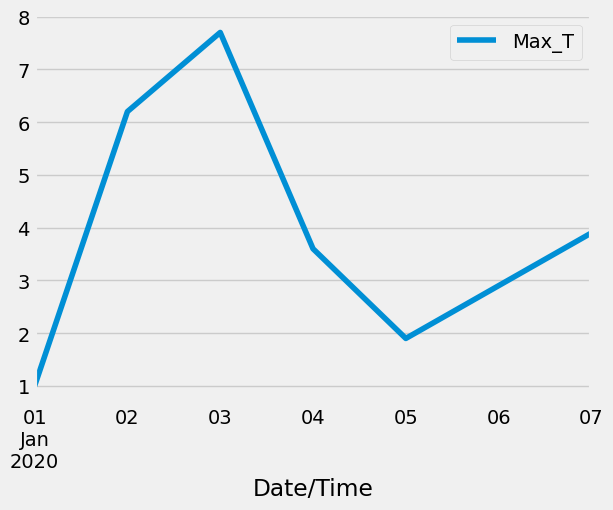

In [5]:
# Week plot

df.loc[(df.index >= "01-01-2020") & (df.index < "01-08-2020")].plot()

In [6]:
# Function to create features


def create_feature(df):
    """
    Create time series features based on time series index
    """
    df = df.copy()
    df["Quarter"] = df.index.quarter
    df["Month"] = df.index.month
    df["DayofYear"] = df.index.dayofyear
    df["DayofMonth"] = df.index.day
    df["Year"] = df.index.year
    return df


df_maxT_model = create_feature(df)

c:\Users\bechede\anaconda3\envs\climate_toronto\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\bechede\anaconda3\envs\climate_toronto\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\bechede\anaconda3\envs\climate_toronto\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\bechede\anaconda3\envs\climate_toronto\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

Text(0.5, 1.0, 'Max Temperature by Month')

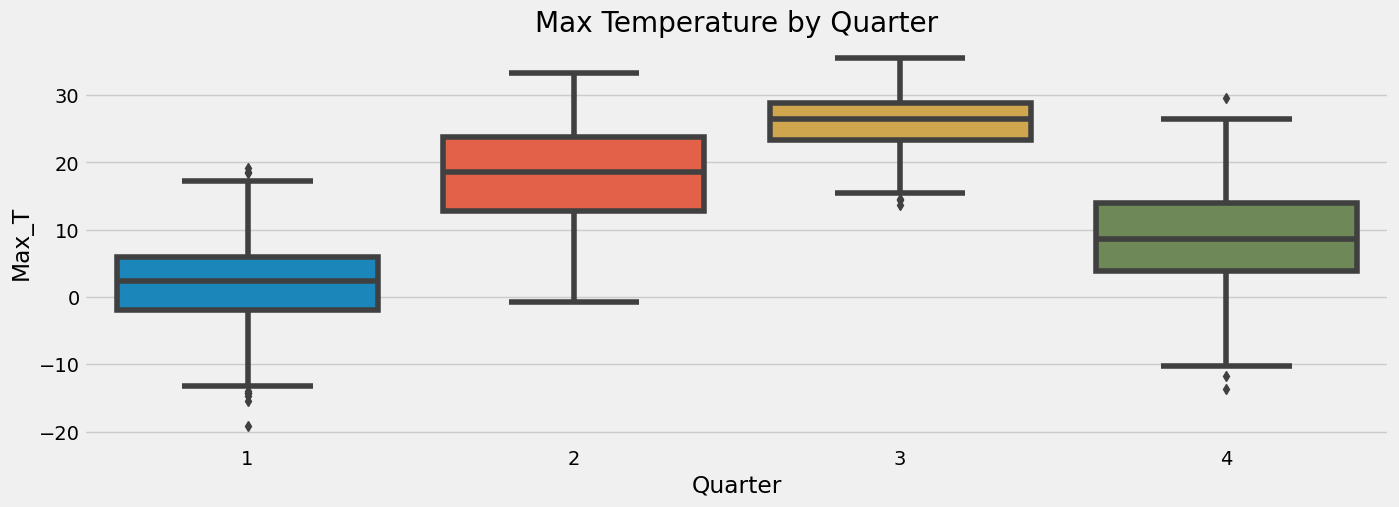

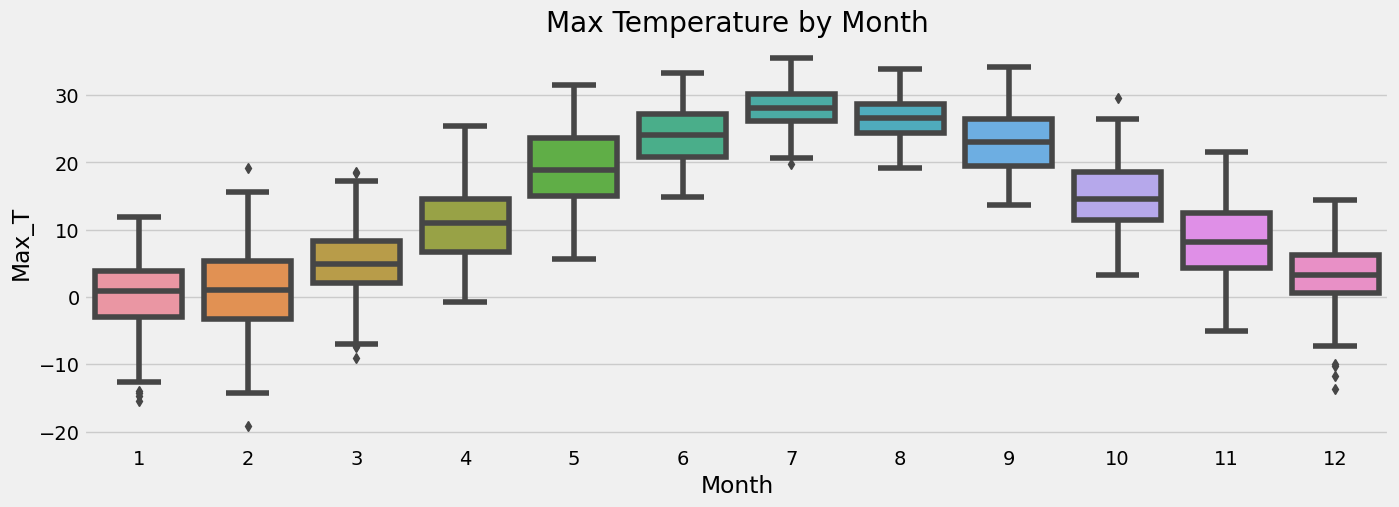

In [7]:
# Visualize our Feature / Target Relationship

fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(data=df_maxT_model, x="Quarter", y="Max_T", ax=ax)
ax.set_title("Max Temperature by Quarter")

fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(data=df_maxT_model, x="Month", y="Max_T", ax=ax)
ax.set_title("Max Temperature by Month")

In [8]:
# Create model

train = create_feature(train)
test = create_feature(test)

features = ["Quarter", "Month", "DayofYear", "DayofMonth", "Year"]
target = "Max_T"

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

reg = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50, learning_rate=0.05)
reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=10)

[0]	validation_0-rmse:10.63094	validation_1-rmse:10.11037


[10]	validation_0-rmse:7.17302	validation_1-rmse:6.87757
[20]	validation_0-rmse:5.30960	validation_1-rmse:5.40904
[30]	validation_0-rmse:4.35006	validation_1-rmse:4.88532
[40]	validation_0-rmse:3.86469	validation_1-rmse:4.74708
[50]	validation_0-rmse:3.59482	validation_1-rmse:4.73311
[60]	validation_0-rmse:3.42204	validation_1-rmse:4.75822
[70]	validation_0-rmse:3.29954	validation_1-rmse:4.81070
[80]	validation_0-rmse:3.21714	validation_1-rmse:4.85286
[90]	validation_0-rmse:3.13759	validation_1-rmse:4.88478
[97]	validation_0-rmse:3.09651	validation_1-rmse:4.90478


c:\Users\bechede\anaconda3\envs\climate_toronto\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\bechede\anaconda3\envs\climate_toronto\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\bechede\anaconda3\envs\climate_toronto\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\bechede\anaconda3\envs\climate_toronto\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categ

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

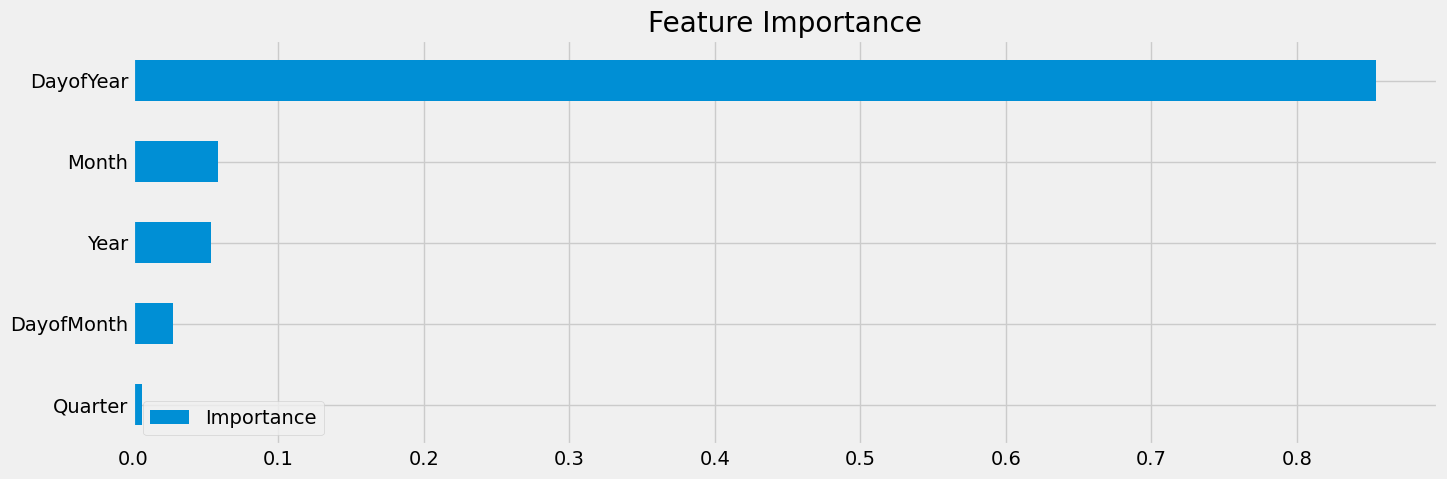

In [9]:
# Feature importance

fi = pd.DataFrame(
    data=reg.feature_importances_, index=reg.feature_names_in_, columns=["Importance"]
)
fi.sort_values(by="Importance", ascending=True).plot(
    kind="barh", figsize=(15, 5), title="Feature Importance"
)
plt.show()

c:\Users\bechede\anaconda3\envs\climate_toronto\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\bechede\anaconda3\envs\climate_toronto\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\bechede\anaconda3\envs\climate_toronto\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\bechede\anaconda3\envs\climate_toronto\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categ

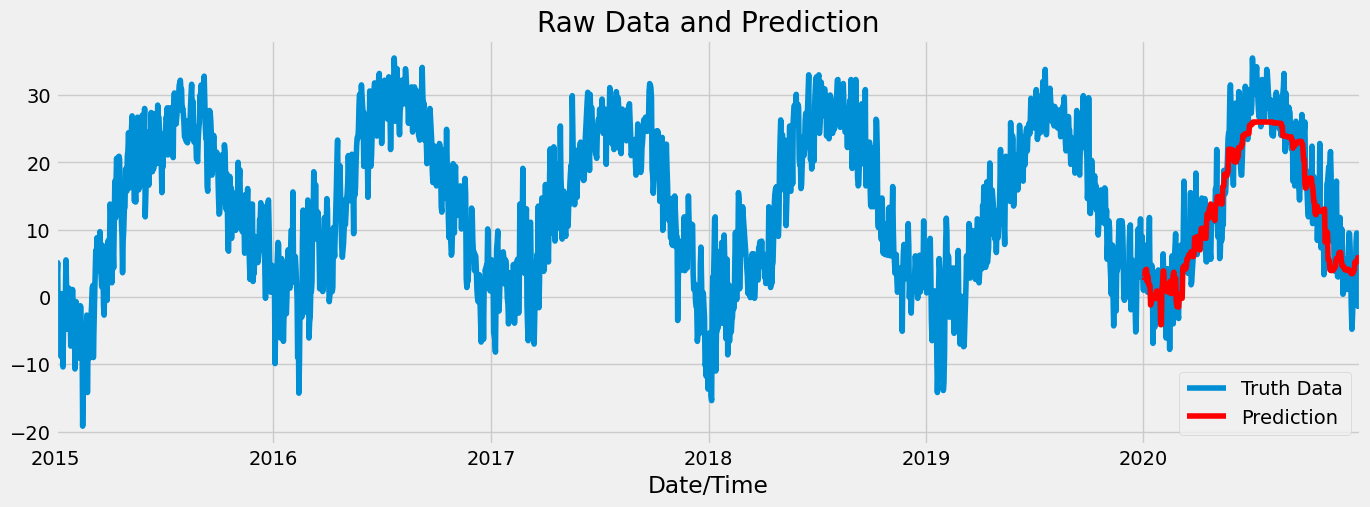

In [10]:
# Forecast on test

test["Prediction"] = reg.predict(X_test)

df_model = df_maxT_model.copy()
df_model = df_maxT_model.merge(
    test[["Prediction"]], how="left", left_index=True, right_index=True
)

ax = df_model["Max_T"].plot(figsize=(15, 5))
df_model["Prediction"].plot(ax=ax, color="red")
plt.legend(["Truth Data", "Prediction"])
ax.set_title("Raw Data and Prediction")
plt.show()

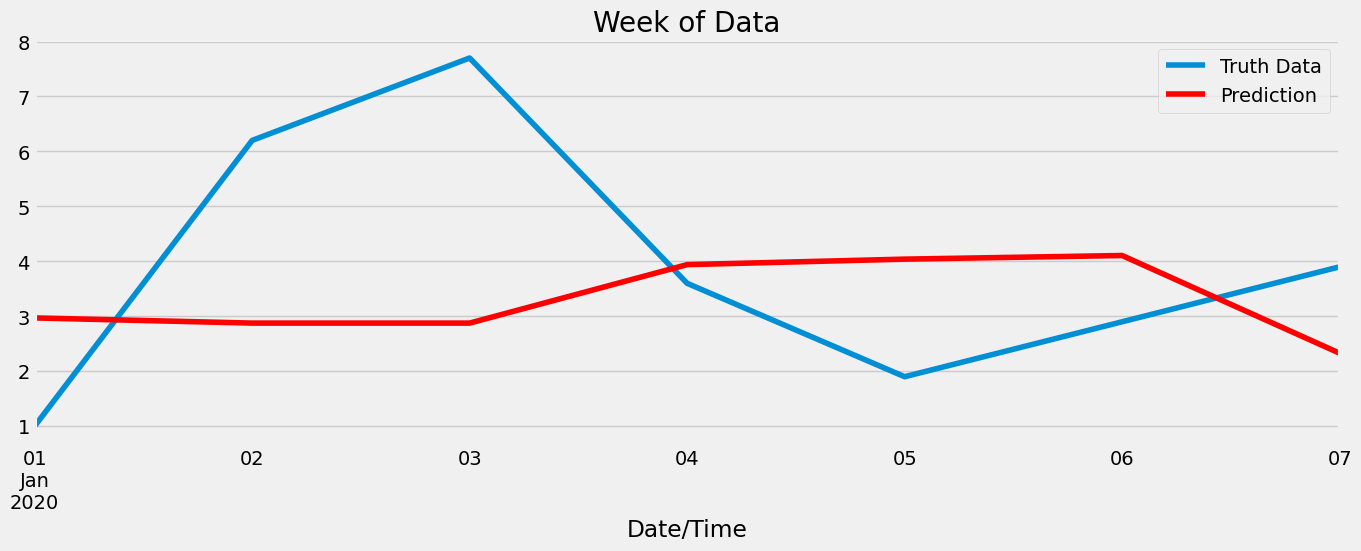

In [11]:
# Week forecast on test

ax = df_model.loc[(df_model.index >= "01-01-2020") & (df_model.index < "01-08-2020")][
    "Max_T"
].plot(figsize=(15, 5), title="Week of Data")
df_model.loc[(df_model.index >= "01-01-2020") & (df_model.index < "01-08-2020")][
    "Prediction"
].plot(ax=ax, color="red")
plt.legend(["Truth Data", "Prediction"])
plt.show()

In [12]:
# Metrics and Evaluation

# Calculate RMSE
score = np.sqrt(mean_squared_error(test["Max_T"], test["Prediction"]))

# Calculate Error
test["Error"] = np.abs(test["Max_T"] - test["Prediction"])

In [13]:
# Worst and best predicted days
print(test.sort_values(by="Error", ascending=True).head(5))  # bests
print(test.sort_values(by="Error", ascending=False).head(5))  # worsts

            Max_T  Quarter  Month  DayofYear  DayofMonth  Year  Prediction  \
Date/Time                                                                    
2020-09-16   23.0        3      9        260          16  2020   23.008041   
2020-02-13    0.8        1      2         44          13  2020    0.737757   
2020-04-09   10.1        2      4        100           9  2020   10.170936   
2020-02-01    1.3        1      2         32           1  2020    1.225005   
2020-06-16   24.1        2      6        168          16  2020   23.984549   

               Error  
Date/Time             
2020-09-16  0.008041  
2020-02-13  0.062243  
2020-04-09  0.070936  
2020-02-01  0.074995  
2020-06-16  0.115451  
            Max_T  Quarter  Month  DayofYear  DayofMonth  Year  Prediction  \
Date/Time                                                                    
2020-11-10   21.6        4     11        315          10  2020    4.028499   
2020-11-09   20.0        4     11        314           9  

# Next steps

- Add more data
- Add more features
- Hyperparameter tuning
- More robust cross validation